#  ブラックボックス最適化(BBO)ベンチマーク

## 手法
### 遺伝的アルゴリズム

### 進化戦略
https://www.jstage.jst.go.jp/article/sicejl/54/8/54_567/_pdf
http://www.matsumoto.nuem.nagoya-u.ac.jp/jascome/denshi-journal/20/No.08-201219.pdf
https://arxiv.org/abs/1604.00772
https://horomary.hatenablog.com/entry/2021/01/23/013508
https://math-note.com/multivariate-normal-distribution/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.facecolor"] = "white"

import os
import time
import datetime
from tqdm import tqdm

from lib.bbo_algo import *
from lib.benchmark_function import *

In [2]:
class BenchMarker():
    def __init__(self,max_iter=100):
        self._bbo_table = {
            'CMA-ES':CMA_ES(),
            'TPE':TPE(),
            'RandomSearch':RandomSearch(),
            'GridSearch':GridSearch(),
            'GA(optuna)':NSGA(),
            'Nelder-Mead':NelderMead(),
            'GA(self made)':GeneticAlgorithm(),            
        }
        
        self._max_iter = max_iter
        self._result_s = dict()

    def benchmark(self,model,is_plot=False):
        

        result_table = {
            'algo':[],
            'calc time':[],
            'fval':[]      
        }

        result = dict()
        for key,value in tqdm(self._bbo_table.items(),leave=False):
            print("{} start!".format(key))

            start_time = time.perf_counter()
            fval,params = value.optimization(model,self._max_iter)
            end_time = time.perf_counter()
            elapsed_time = end_time - start_time

            result.update({key:(fval,params)})
            fval_s,params_s = value.get_history()
            self._result_s.update({key:(fval_s,params_s)})

            result_table['algo'].append(key)
            result_table['calc time'].append(elapsed_time)
            result_table['fval'].append(fval)
            
            del value


        for key,value in result.items():
            print("{} achieved {}.".format(key,value[0]))

        if is_plot:
            self.plot_history()

        return pd.DataFrame(result_table) 

    def plot_history(self,
                    fig_name=None,
                    is_log = False,
                    is_save=False
                    ):
        plt.figure()

        trial = [i for i in range(self._max_iter)]
        for key,value in self._result_s.items():
            plt.plot(trial,value[0],label=key)
        plt.legend()
        plt.xlabel('Trial')
        plt.ylabel('Evaluation value')

        if is_log:
            plt.yscale('log')
        if is_save:
            os.makedirs('fig',exist_ok=True)
            if fig_name:
                d = fig_name
            else:
                now = datetime.datetime.now()
                d = now.strftime('%Y%m%d%H%M%S')
            plt.savefig('fig/'+d+'.png' ,format="png" ,dpi=300)
        plt.show()      

  0%|          | 0/7 [00:00<?, ?it/s]

CMA-ES start!


TPE start!


RandomSearch start!
GridSearch start!


/home/atnet/workspace/.venv/lib/python3.9/site-packages/scipy/optimize/_minimize.py:533: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


GA(optuna) start!
Nelder-Mead start!
GA(self made) start!


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


CMA-ES achieved 6.041157676651309.
TPE achieved 79.46723446194689.
RandomSearch achieved 127.10058464845017.
GridSearch achieved 1000.0.
GA(optuna) achieved 82.3671844897604.
Nelder-Mead achieved 71.02428990012139.
GA(self made) achieved 26.51555478271107.


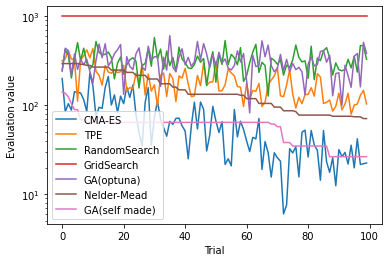

 14%|█▍        | 1/7 [00:08<00:48,  8.05s/it]

CMA-ES start!


TPE start!


RandomSearch start!
GridSearch start!


/home/atnet/workspace/.venv/lib/python3.9/site-packages/scipy/optimize/_minimize.py:533: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


GA(optuna) start!
Nelder-Mead start!
GA(self made) start!


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


CMA-ES achieved 164.82851625525836.
TPE achieved 120.89933500379584.
RandomSearch achieved 118.96054655751084.
GridSearch achieved 1441.66165.
GA(optuna) achieved 166.77031584478604.
Nelder-Mead achieved 134.27929473751334.
GA(self made) achieved 18.302930278871713.


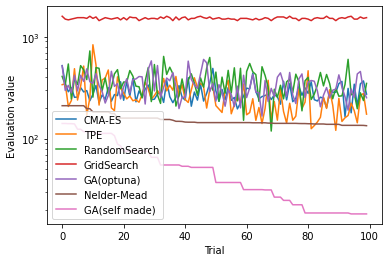

 29%|██▊       | 2/7 [00:15<00:39,  7.90s/it]

CMA-ES start!
TPE start!


RandomSearch start!
GridSearch start!


/home/atnet/workspace/.venv/lib/python3.9/site-packages/scipy/optimize/_minimize.py:533: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


GA(optuna) start!
Nelder-Mead start!
GA(self made) start!


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


CMA-ES achieved 0.4654926234827025.
TPE achieved 0.7756735020998107.
RandomSearch achieved 0.9579193743873637.
GridSearch achieved 1.0625034526505146.
GA(optuna) achieved 0.9992174688953259.
Nelder-Mead achieved 0.995016869925908.
GA(self made) achieved 0.13566345630428756.


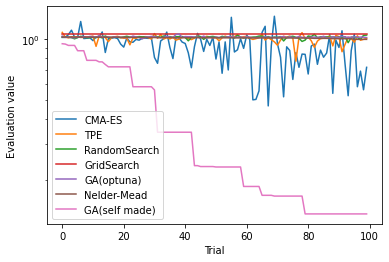

 43%|████▎     | 3/7 [00:23<00:30,  7.74s/it]

CMA-ES start!
TPE start!


RandomSearch start!
GridSearch start!


/home/atnet/workspace/.venv/lib/python3.9/site-packages/scipy/optimize/_minimize.py:533: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


GA(optuna) start!
Nelder-Mead start!
GA(self made) start!


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


CMA-ES achieved 9.650695918653366.
TPE achieved 18.06968974589431.
RandomSearch achieved 19.894151311294895.
GridSearch achieved 19.950424956466673.
GA(optuna) achieved 19.199249842203244.
Nelder-Mead achieved 19.32534171750359.
GA(self made) achieved 7.950914263508917.


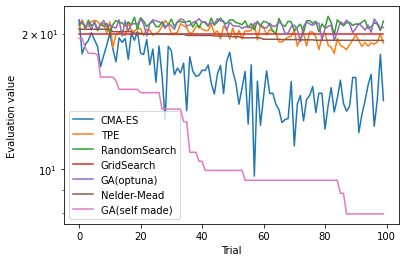

 57%|█████▋    | 4/7 [00:30<00:22,  7.65s/it]

CMA-ES start!
TPE start!


RandomSearch start!
GridSearch start!


GA(optuna) start!
Nelder-Mead start!
GA(self made) start!


/home/atnet/workspace/.venv/lib/python3.9/site-packages/scipy/optimize/_minimize.py:533: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,
/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


CMA-ES achieved 269.1086575506968.
TPE achieved 3317.4202306444636.
RandomSearch achieved 8522.945534839193.
GridSearch achieved 410144.0.
GA(optuna) achieved 32358.879874272003.
Nelder-Mead achieved 23713.605480370323.
GA(self made) achieved 156.7971769173898.


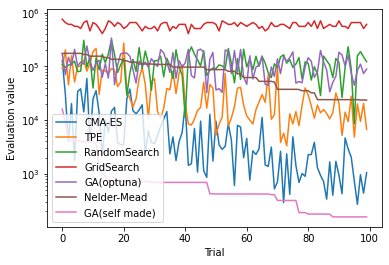

 71%|███████▏  | 5/7 [00:38<00:15,  7.66s/it]

CMA-ES start!
TPE start!


RandomSearch start!
GridSearch start!


/home/atnet/workspace/.venv/lib/python3.9/site-packages/scipy/optimize/_minimize.py:533: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


GA(optuna) start!
Nelder-Mead start!
GA(self made) start!


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


CMA-ES achieved 3381.9746008185743.
TPE achieved 2410.73676612511.
RandomSearch achieved 2556.7911915087175.
GridSearch achieved 2745.1157317488655.
GA(optuna) achieved 2809.4224245822907.
Nelder-Mead achieved 1172.882865903316.
GA(self made) achieved 467.3454062485757.


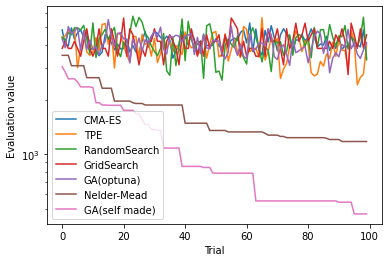

 86%|████████▌ | 6/7 [00:46<00:07,  7.62s/it]

CMA-ES start!
TPE start!


RandomSearch start!
GridSearch start!


/home/atnet/workspace/.venv/lib/python3.9/site-packages/scipy/optimize/_minimize.py:533: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


GA(optuna) start!
Nelder-Mead start!
GA(self made) start!


/home/atnet/workspace/.venv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


CMA-ES achieved 0.010001090141082258.
TPE achieved 0.033387872933049074.
RandomSearch achieved 0.09529471287666794.
GridSearch achieved 1217284.4761831912.
GA(optuna) achieved 0.01773647023362839.
Nelder-Mead achieved 0.30705311801407864.
GA(self made) achieved 0.001765613495637544.


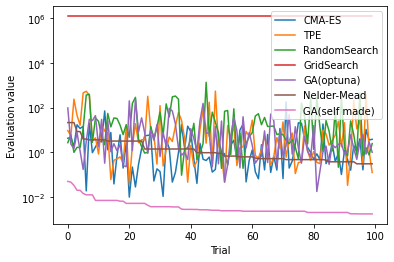

100%|██████████| 7/7 [00:53<00:00,  7.65s/it]


In [3]:
df = pd.DataFrame()
dim_s = [10]
max_iter =100

for dim in dim_s:
    model_s = {
                'QuadraticFunction':QuadraticFunction(dim=dim),
                'StyblinskiTangFunction':StyblinskiTangFunction(dim=dim),
                'GriewankFunction':GriewankFunction(dim=dim),
                'AckleyFunction':AckleyFunction(dim=dim),
                'RosenbrockFunction':RosenbrockFunction(dim=dim),
                'SchwefelFunction':SchwefelFunction(dim=dim),
                'XinSheYangFunction':XinSheYangFunction(dim=dim),
            }

    for name,model in tqdm(model_s.items()):
        dict_additional = {
            'dimention':[],
            'model name':[]
        }

        bm = BenchMarker(max_iter=max_iter)
        df_temp = bm.benchmark(model = model)
        bm.plot_history(fig_name=str(dim)+'_'+name,is_log=True,is_save=True)

        
        dict_additional['dimention']=[dim for i in range(len(model_s))]
        dict_additional['model name']=[name for i in range(len(model_s))]
        df_additional = pd.DataFrame(dict_additional)

        df_temp = pd.concat([df_temp, df_additional], axis=1)
                
        df = pd.concat([df,df_temp])

In [4]:
df

,algo,calc time,fval,dimention,model name
0,CMA-ES,0.182426,6.041158e+00,10,QuadraticFunction
1,TPE,2.904325,7.946723e+01,10,QuadraticFunction
2,RandomSearch,0.155298,1.271006e+02,10,QuadraticFunction
3,GridSearch,0.189727,1.000000e+03,10,QuadraticFunction
4,GA(optuna),0.136883,8.236718e+01,10,QuadraticFunction
5,Nelder-Mead,0.010686,7.102429e+01,10,QuadraticFunction
6,GA(self made),3.415742,2.651555e+01,10,QuadraticFunction
0,CMA-ES,0.179079,1.648285e+02,10,StyblinskiTangFunction
1,TPE,2.854002,1.208993e+02,10,StyblinskiTangFunction
2,RandomSearch,0.156189,1.189605e+02,10,StyblinskiTangFunction
